
Personal Finance Tracker
1. Add Transaction
2. View Transactions
3. Export to CSV
4. Generate Reports
5. Set Budget
6. Exit



Enter your choice:  1
Enter the date (YYYY-MM-DD):  2025-01-30
Enter the type (income/expense):  income
Enter the category (e.g., salary, groceries, rent):  salary
Enter the amount:  12000


C:\Users\91942\AppData\Local\Temp\ipykernel_9360\972606208.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame({"Date": [date], "Type": [trans_type], "Category": [category], "Amount": [amount]})], ignore_index=True)


Transaction added successfully!


Personal Finance Tracker
1. Add Transaction
2. View Transactions
3. Export to CSV
4. Generate Reports
5. Set Budget
6. Exit



Enter your choice:  2



All Transactions:
      Date   Type Category  Amount
2025-01-30 income   salary 12000.0

Personal Finance Tracker
1. Add Transaction
2. View Transactions
3. Export to CSV
4. Generate Reports
5. Set Budget
6. Exit



Enter your choice:  3


Data exported to finance_data.csv


Personal Finance Tracker
1. Add Transaction
2. View Transactions
3. Export to CSV
4. Generate Reports
5. Set Budget
6. Exit



Enter your choice:  4


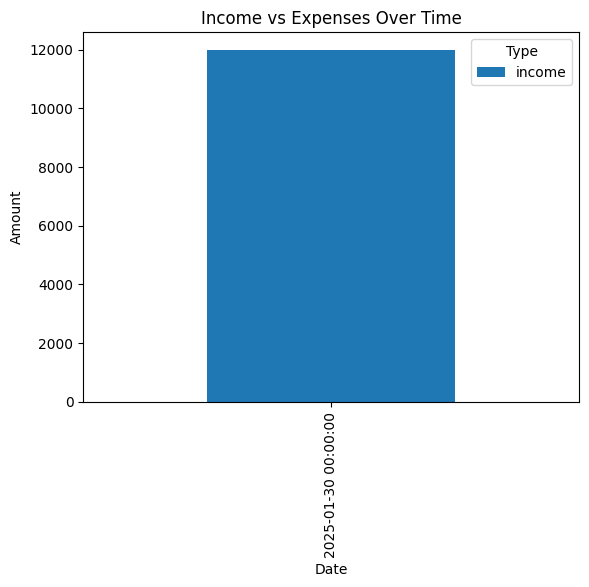


Personal Finance Tracker
1. Add Transaction
2. View Transactions
3. Export to CSV
4. Generate Reports
5. Set Budget
6. Exit



Enter your choice:  6


Exiting... Goodbye!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize DataFrame to store financial data
data = pd.DataFrame(columns=["Date", "Type", "Category", "Amount"])

def add_transaction():
    """Add income or expense transaction."""
    global data
    date = input("Enter the date (YYYY-MM-DD): ")
    trans_type = input("Enter the type (income/expense): ").lower()
    category = input("Enter the category (e.g., salary, groceries, rent): ").lower()
    amount = float(input("Enter the amount: "))
    
    # Append the new transaction to the DataFrame
    data = pd.concat([data, pd.DataFrame({"Date": [date], "Type": [trans_type], "Category": [category], "Amount": [amount]})], ignore_index=True)
    print("Transaction added successfully!\n")

def view_transactions():
    """View all transactions."""
    global data
    print("\nAll Transactions:")
    print(data.to_string(index=False))

def export_to_csv(filename="finance_data.csv"):
    """Export data to a CSV file."""
    global data
    data.to_csv(filename, index=False)
    print(f"Data exported to {filename}\n")

def generate_reports():
    """Generate spending and income visualizations."""
    global data
    if data.empty:
        print("No data to visualize!")
        return

    # Spending distribution by category
    expense_data = data[data["Type"] == "expense"]
    if not expense_data.empty:
        expense_data.groupby("Category")["Amount"].sum().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title("Spending by Category")
        plt.ylabel("")
        plt.show()

    # Income vs Expenses over time
    data["Date"] = pd.to_datetime(data["Date"])  # Ensure Date is in datetime format
    income_expense_summary = data.groupby(["Date", "Type"])["Amount"].sum().unstack().fillna(0)
    income_expense_summary.plot(kind="bar", stacked=True)
    plt.title("Income vs Expenses Over Time")
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.show()

def set_budget():
    """Set a budget goal and track progress."""
    global data
    budget = float(input("Enter your monthly budget: "))
    monthly_expense = data[data["Type"] == "expense"]["Amount"].sum()
    print(f"Your total expenses this month: {monthly_expense}")
    if monthly_expense > budget:
        print("⚠ You've exceeded your budget!")
    else:
        print(f"✅ You're within your budget! Remaining: {budget - monthly_expense}\n")

def menu():
    """Display the menu options."""
    print("\nPersonal Finance Tracker")
    print("1. Add Transaction")
    print("2. View Transactions")
    print("3. Export to CSV")
    print("4. Generate Reports")
    print("5. Set Budget")
    print("6. Exit")

while True:
    menu()
    choice = input("\nEnter your choice: ")
    if choice == "1":
        add_transaction()
    elif choice == "2":
        view_transactions()
    elif choice == "3":
        export_to_csv()
    elif choice == "4":
        generate_reports()
    elif choice == "5":
        set_budget()
    elif choice == "6":
        print("Exiting... Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")